In [1]:
!pip install textblob

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

In [3]:
df = pd.read_csv('Elon_musk.csv',encoding="latin-1")
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
df.shape

(1999, 2)

In [5]:
df=df.drop(("Unnamed: 0"),axis=1)

In [6]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
#Number of Words in single tweet
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [8]:
#Number of characters in single tweet
df['char_count'] = df['Text'].str.len() ## this also includes spaces
df[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [9]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Text'].apply(lambda x: avg_word(x))
df[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


In [10]:
stop = stopwords.words('english')

df['stopwords'] = df['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


In [11]:
df['hastags'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


In [12]:
df['numerics'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Text','numerics']].head()


,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [13]:
df['upper'] = df['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


In [14]:
#converting all the text into lower case
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [15]:
#removing punctuation
df['Text'] = df['Text'].str.replace('[^\w\s]_','')
df['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [16]:
#removing stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'].head()

0                                  @kunalb11 im alien
1    @id_aa_carmack ray tracing cyberpunk hdr next-...
2                  @joerogan @spotify great interview!
3                         @gtera27 doge underestimated
4    @teslacn congratulations tesla china amazing e...
Name: Text, dtype: object

In [17]:
#removing repeated/common words 
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[:10]
freq


&amp;              218
@erdayastronaut    140
@spacex            140
rt                 127
@ppathole          123
@flcnhvy           114
tesla               85
@teslaownerssv      73
@spacex:            71
@wholemarsblog      68
dtype: int64

In [18]:
freq = list(freq.index)
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Text'].head()

0                                  @kunalb11 im alien
1    @id_aa_carmack ray tracing cyberpunk hdr next-...
2                  @joerogan @spotify great interview!
3                         @gtera27 doge underestimated
4    @teslacn congratulations china amazing executi...
Name: Text, dtype: object

In [19]:
freq = pd.Series(' '.join(df['Text']).split()).value_counts()[-10:]
freq

https://t.co/dm76fjq3hx    1
400                        1
bombard                    1
mine                       1
alpha                      1
agree.                     1
exchanging                 1
play!                      1
voice                      1
antibody                   1
dtype: int64

In [20]:
#correcting the spellings
df['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                  @kunalb11 im alien
1    @id_aa_carmack ray tracing cyberpunk her next-...
2                  @joerogan @specify great interview!
3                         @gtera27 done underestimated
4    @teslacn congratulations china amazing executi...
Name: Text, dtype: object

In [21]:
#Tokenization
TextBlob(df['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', 'tried', 'it'])

In [22]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0                                  @kunalb11 im alien
1    @id_aa_carmack ray trace cyberpunk hdr next-le...
2                  @joerogan @spotifi great interview!
3                             @gtera27 doge underestim
4    @teslacn congratul china amaz execut last year...
Name: Text, dtype: object

In [23]:
#Lemmatization
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Text'].head()

0                                  @kunalb11 im alien
1    @id_aa_carmack ray tracing cyberpunk hdr next-...
2                  @joerogan @spotify great interview!
3                         @gtera27 doge underestimated
4    @teslacn congratulation china amazing executio...
Name: Text, dtype: object

In [24]:
#N-grams
TextBlob(df['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'i\x92m']), WordList(['i\x92m', 'alien'])]

In [25]:
#Term-Frequency
tf1 = (df['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,ray,1
1,tried,1
2,hdr,1
3,cyberpunk,1
4,it?,1
5,tracing,1
6,@id_aa_carmack,1
7,next-level.,1


In [26]:
#Inverse-Document Frequency
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,ray,1,5.035453
1,tried,1,5.808643
2,hdr,1,6.907255
3,cyberpunk,1,5.115496
4,it?,1,0.145104
5,tracing,1,7.600402
6,@id_aa_carmack,1,4.166415
7,next-level.,1,7.600402


In [27]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,ray,1,5.035453,5.035453
1,tried,1,5.808643,5.808643
2,hdr,1,6.907255,6.907255
3,cyberpunk,1,5.115496,5.115496
4,it?,1,0.145104,0.145104
5,tracing,1,7.600402,7.600402
6,@id_aa_carmack,1,4.166415,4.166415
7,next-level.,1,7.600402,7.600402


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(df['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 8247 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(df['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 9774 stored elements in Compressed Sparse Row format>

In [30]:
df['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                      (-0.25, 0.75)
1                         (0.0, 0.0)
2                        (1.0, 0.75)
3                         (0.0, 0.0)
4    (0.3453125, 0.3666666666666667)
Name: Text, dtype: object

In [31]:
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['Text','sentiment']].head()

,Text,sentiment
0,@kunalb11 im alien,-0.250000
1,@id_aa_carmack ray tracing cyberpunk hdr next-...,0.000000
2,@joerogan @spotify great interview!,1.000000
3,@gtera27 doge underestimated,0.000000
4,@teslacn congratulation china amazing executio...,0.345313


In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [33]:
data=pd.read_csv("amazon_alexa.csv",error_bad_lines=False)
data

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [34]:
data=data.drop("rating",axis=1)
data

,date,variation,verified_reviews,feedback
0,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,31-Jul-18,Charcoal Fabric,Loved it!,1
2,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...
3145,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [35]:
data=data.drop("date",axis=1)
data

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [36]:
data=data.drop("variation",axis=1)
data

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1


In [37]:
data=data.drop("feedback",axis=1)
data

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [38]:
data=data.rename({'verified_reviews':'reviews'},axis=1)
data

,reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [39]:
data = [x.strip() for x in data.reviews] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False
data[0:10]

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [40]:
# Joining the list into one string/text
text = ' '.join(data)
text

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [41]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Love my Echo Loved it Sometimes while playing a game you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home I have had a lot of fun with this thing My 4 yr old learns about dinosaurs i control the lights and play games like categories Has nice sound when playing music as well Music I received the echo as a gift I needed another Bluetooth or something to play music easily accessible and found this smart speaker Can’t wait to see what else it can do Without having a cellphone I cannot use many of her features I have an iPad but do not see that of any use  It IS a great alarm  If u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herIt is fun to ask random questions to hear her response  She does not seem to be very smartbon politics yet I think this is the 5th one Ive purchased Im working on getting one in every room o

In [42]:
no_punc_text=no_punc_text.lower()
no_punc_text

'love my echo loved it sometimes while playing a game you can answer a question correctly but alexa says you got it wrong and answers the same as you  i like being able to turn lights on and off while away from home i have had a lot of fun with this thing my 4 yr old learns about dinosaurs i control the lights and play games like categories has nice sound when playing music as well music i received the echo as a gift i needed another bluetooth or something to play music easily accessible and found this smart speaker can’t wait to see what else it can do without having a cellphone i cannot use many of her features i have an ipad but do not see that of any use  it is a great alarm  if u r almost deaf you can hear her alarm in the bedroom from out in the living room so that is reason enough to keep herit is fun to ask random questions to hear her response  she does not seem to be very smartbon politics yet i think this is the 5th one ive purchased im working on getting one in every room o

In [43]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['love', 'my', 'echo', 'loved', 'it', 'sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'i', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home', 'i', 'have', 'had', 'a', 'lot', 'of', 'fun']


In [44]:
len(text_tokens)

80498

In [45]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['love', 'echo', 'loved', 'sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'alexa', 'says', 'got', 'wrong', 'answers', 'like', 'able', 'turn', 'lights', 'away', 'home', 'lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well', 'music']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PAVAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['love', 'echo', 'loved', 'sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'alexa', 'says', 'got', 'wrong', 'answers', 'like', 'able', 'turn', 'lights', 'away', 'home', 'lot', 'fun', 'thing', '4', 'yr']


In [47]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['love', 'echo', 'love', 'sometim', 'play', 'game', 'answer', 'question', 'correctli', 'alexa', 'say', 'got', 'wrong', 'answer', 'like', 'abl', 'turn', 'light', 'away', 'home', 'lot', 'fun', 'thing', '4', 'yr', 'old', 'learn', 'dinosaur', 'control', 'light', 'play', 'game', 'like', 'categori', 'nice', 'sound', 'play', 'music', 'well', 'music']


In [48]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm') 

In [49]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

love echo loved sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well music


In [50]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['love', 'echo', 'love', 'sometimes', 'play', 'game', 'answer', 'question', 'correctly', 'alexa', 'say', 'get', 'wrong', 'answer', 'like', 'able', 'turn', 'light', 'away', 'home', 'lot', 'fun', 'thing', '4', 'yr']


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [52]:
print(vectorizer.vocabulary_)

{'love': 1930, 'echo': 1071, 'sometimes': 2919, 'play': 2369, 'game': 1374, 'answer': 303, 'question': 2513, 'correctly': 803, 'alexa': 241, 'say': 2718, 'get': 1402, 'wrong': 3546, 'like': 1878, 'able': 139, 'turn': 3292, 'light': 1867, 'away': 398, 'home': 1560, 'lot': 1924, 'fun': 1353, 'thing': 3179, 'yr': 3568, 'old': 2198, 'learn': 1846, 'dinosaur': 972, 'control': 781, 'category': 611, 'nice': 2132, 'sound': 2940, 'music': 2073, 'well': 3480, 'receive': 2567, 'gift': 1407, 'need': 2107, 'another': 302, 'bluetooth': 498, 'something': 2917, 'easily': 1067, 'accessible': 150, 'find': 1287, 'smart': 2884, 'speaker': 2961, 'wait': 3439, 'see': 2759, 'else': 1110, 'without': 3519, 'cellphone': 622, 'use': 3372, 'many': 1975, 'feature': 1267, 'ipad': 1729, 'great': 1453, 'alarm': 233, 'almost': 259, 'deaf': 879, 'hear': 1522, 'bedroom': 448, 'living': 1895, 'room': 2681, 'reason': 2561, 'enough': 1133, 'keep': 1787, 'herit': 1539, 'ask': 355, 'random': 2535, 'response': 2650, 'seem': 2

In [53]:
print(X.toarray().shape)

(41391, 3577)


In [54]:
cleaned_data = [x.translate(str.maketrans('', '', string.punctuation)) for x in vectorizer.vocabulary_]
cleaned_data

['love',
 'echo',
 'sometimes',
 'play',
 'game',
 'answer',
 'question',
 'correctly',
 'alexa',
 'say',
 'get',
 'wrong',
 'like',
 'able',
 'turn',
 'light',
 'away',
 'home',
 'lot',
 'fun',
 'thing',
 'yr',
 'old',
 'learn',
 'dinosaur',
 'control',
 'category',
 'nice',
 'sound',
 'music',
 'well',
 'receive',
 'gift',
 'need',
 'another',
 'bluetooth',
 'something',
 'easily',
 'accessible',
 'find',
 'smart',
 'speaker',
 'wait',
 'see',
 'else',
 'without',
 'cellphone',
 'use',
 'many',
 'feature',
 'ipad',
 'great',
 'alarm',
 'almost',
 'deaf',
 'hear',
 'bedroom',
 'living',
 'room',
 'reason',
 'enough',
 'keep',
 'herit',
 'ask',
 'random',
 'response',
 'seem',
 'smartbon',
 'politic',
 'yet',
 'think',
 '5th',
 'one',
 've',
 'purchase',
 'work',
 'every',
 'house',
 'really',
 'offer',
 'specifily',
 'echos',
 'throughout',
 'look',
 'listen',
 'song',
 'since',
 'childhood',
 'news',
 'weather',
 'information',
 'send',
 '85',
 'year',
 'dad',
 'talk',
 'constantly',

In [55]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(cleaned_data)

In [56]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['072318', 'photograph', 'phrase', 'pia', 'pic', 'pick', 'picking', 'pickup', 'picky', 'picture', 'piece', 'pin', 'pivot', 'pixelate', 'pizza', 'place', 'placement', 'plain', 'plan', 'plane', 'planning', 'platform', 'play', 'player', 'playing', 'playingi', 'playlist', 'playlisti', 'playlistswhat', 'pleasantly', 'please', 'pleased', 'pleasedsimple', 'pleasure', 'plenty', 'plug', 'plugha', 'plugin', 'plus', 'plusminus', 'plusprimeetc', 'pluto', 'pod', 'podcast', 'point', 'point34', 'pointless', 'pointlessi', 'politic', 'pool', 'poop', 'poor', 'pop', 'porch', 'porchthe', 'port', 'portability', 'portable', 'portion', 'pose', 'position', 'positive', 'possibility', 'possible', 'possibly', 'post', 'poster', 'potential', 'pound', 'powercord', 'powerful', 'practical', 'premium', 'prepare', 'present', 'preset', 'press', 'presumably', 'prettier', 'pretty', 'prevent', 'preview', 'previous', 'previously', 'price', 'pricey', 'primarily', 'primary', 'prime', 'primeday', 'print', 'prior', 'privacy', '

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 1000)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(vectorizer.vocabulary_)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['072318', 'key', 'keyboard', 'kick', 'kid', 'kidfriendly', 'kids', 'killer', 'kind', 'kinda', 'kindle', 'king', 'kitchen', 'kitchenden', 'kitchenlive', 'kitchenliving', 'knee', 'knob', 'knock', 'know', 'knowledgable', 'knowledge', 'knowledgeable', 'kodi', 'kong', 'korea', 'kwikset', 'la', 'label', 'lack', 'lady', 'lag', 'lagging', 'lame', 'lamp', 'land', 'language', 'lapse', 'laptop', 'laptopdesktop', 'large', 'las', 'last', 'lastly', 'late', 'lately', 'later', 'laud', 'laugh', 'laundry', 'law', 'lay', 'layer', 'lazy', 'lcd', 'lead', 'lean', 'learn', 'learnimg', 'learning', 'leary', 'least', 'leave', 'leg', 'legally', 'leisure', 'length', 'less', 'lesson', 'let', 'level', 'levelsall', 'librarie', 'library', 'life', 'lifechange', 'lifetime', 'lifht', 'light', 'light34', 'light34i', 'lightbulb', 'lighten', 'lighting', 'lightning', 'lights', 'lights34', 'lights34as', 'lightswithout', 'like', 'likely', 'lil', 'lilttle', 'limit', 'limitation', 'limited', 'line', 'link', 'linksplug', 'list'

In [58]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

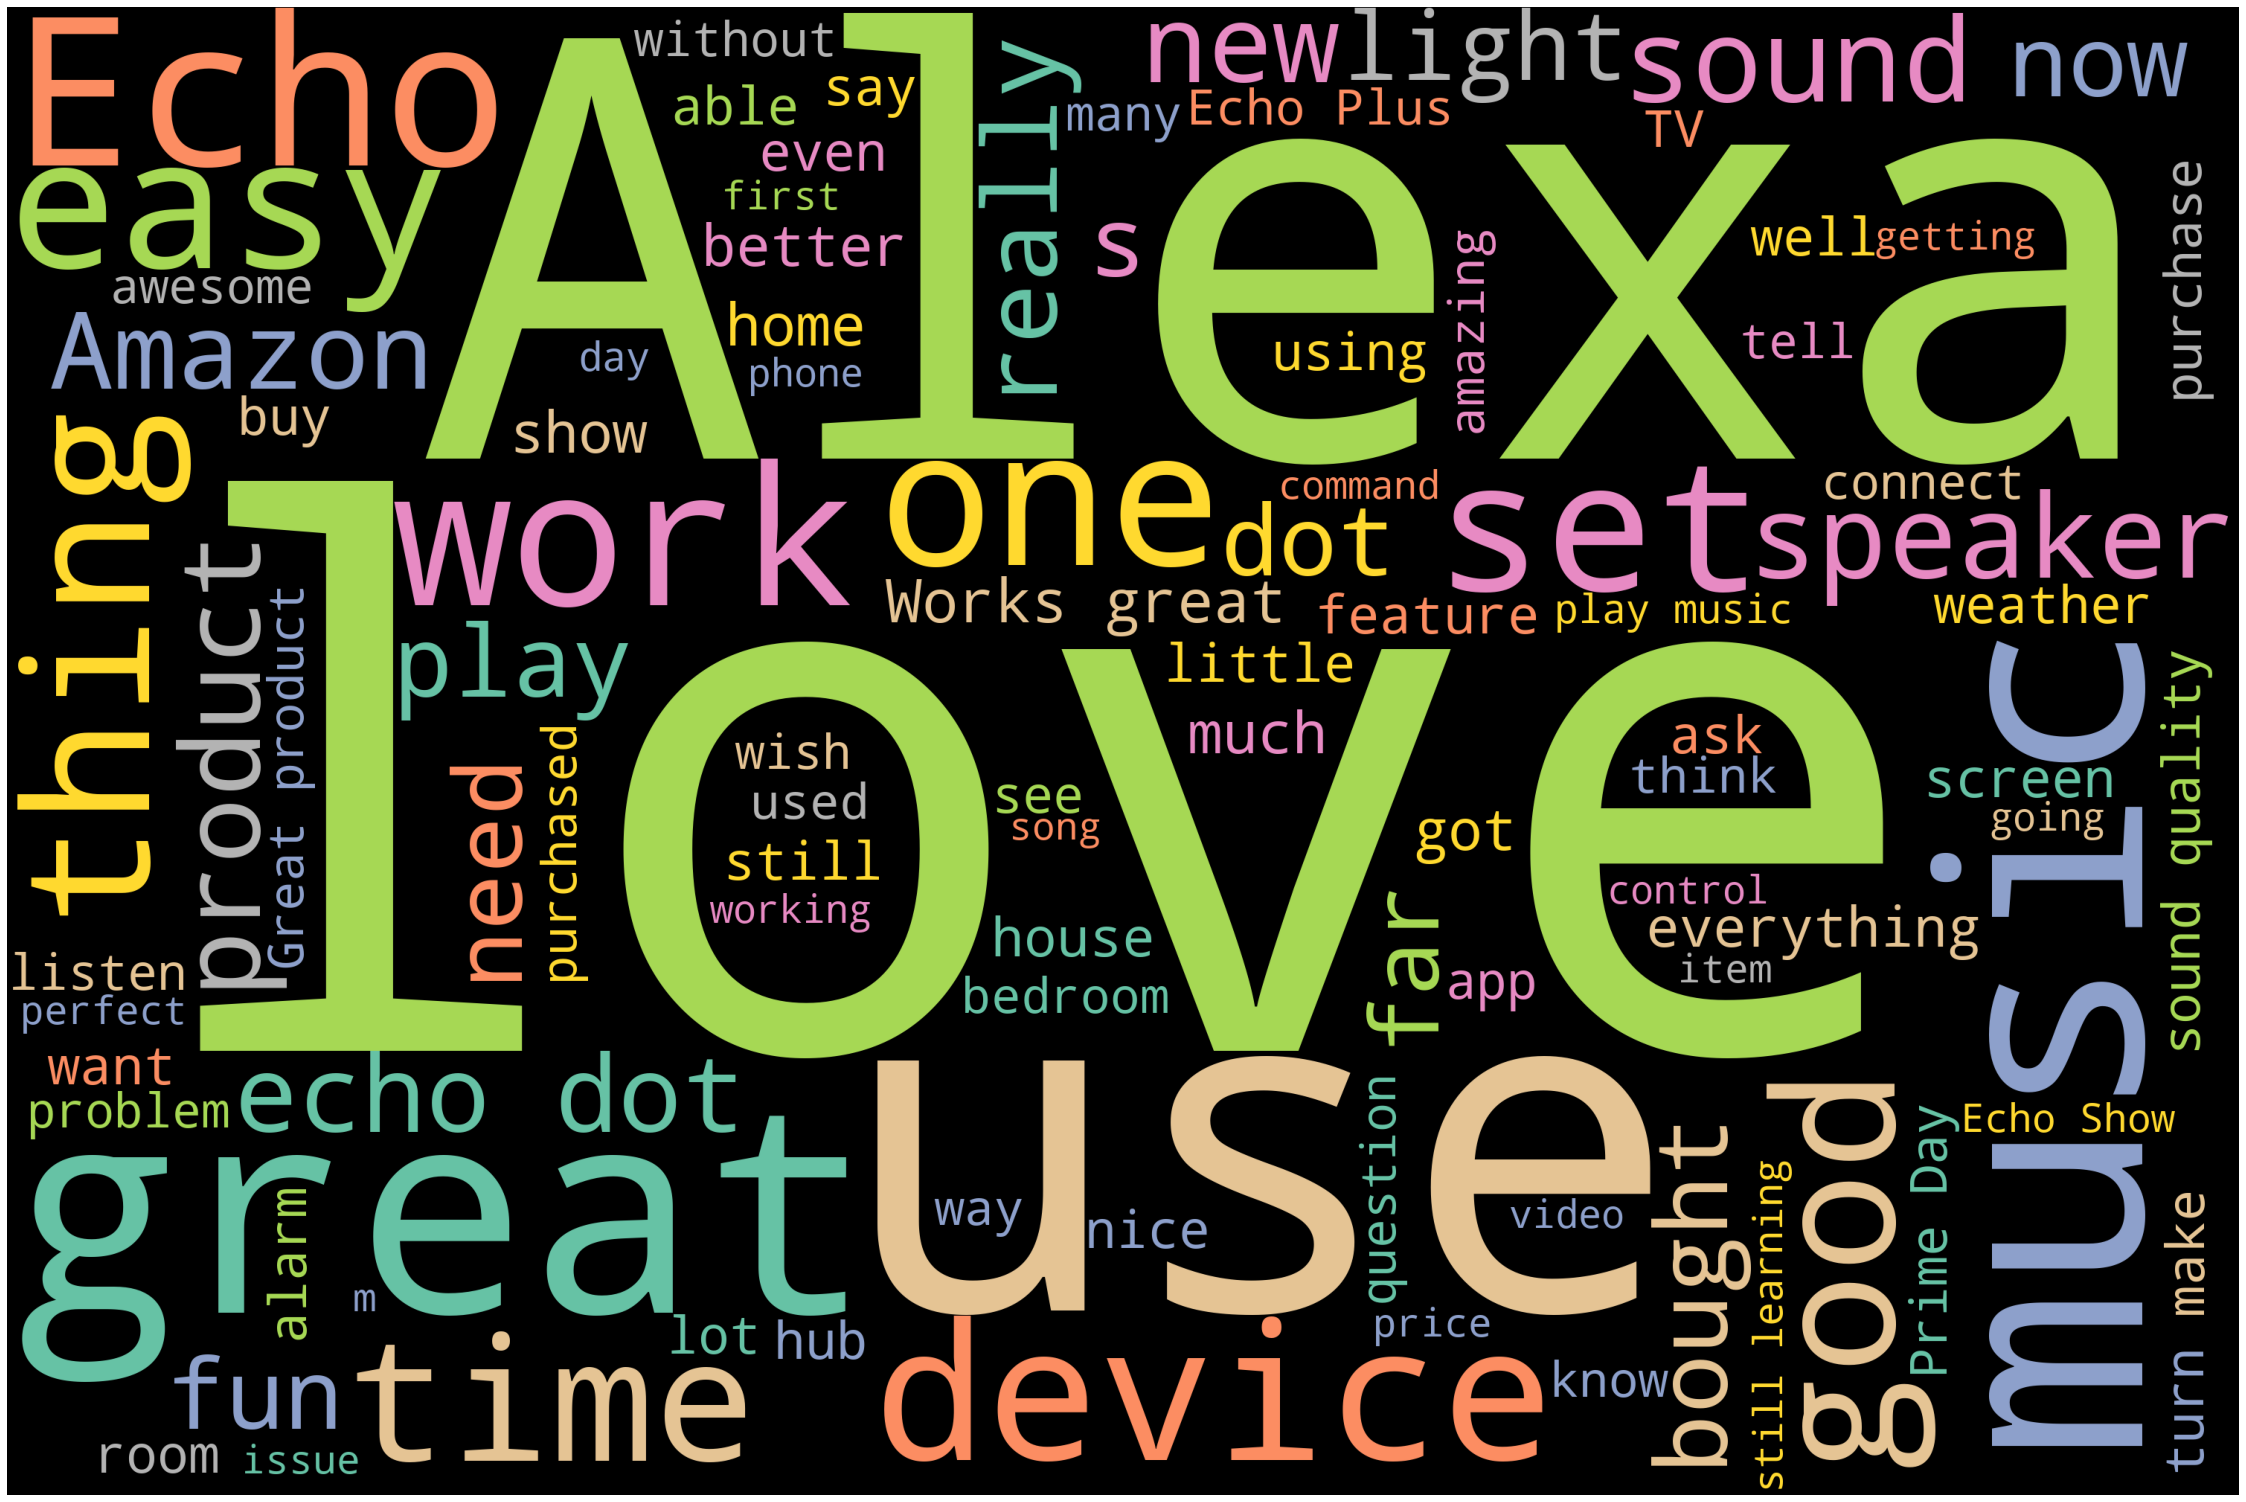

In [59]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)